In [1]:
%matplotlib inline
import time
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14, 10)
import tridesclous as tdc

# Important details

# Multi segment

![image](img/multi_segment_diagram.png)

# PRB files, describe channel_group + geometry

A typical PRB file look like this, here 8 channels (2 tetrodes):

```python
    channel_groups = {
        0: {
            'channels': [0, 1, 2, 3],
            'geometry': {
                0 : [-50, 0],
                1 : [0, 50],
                2 : [50, 0],
                3 : [0, -50]
            },
        1: {
            'channels': [4, 5, 6, 7],
            'geometry': {
                4 : [-50, 0],
                5 : [0, 50],
                6 : [50, 0],
                7 : [0, -50],
        },
    }
```

# Pre-processing filter : use forward-backward

In scipy.signal you have:
  * scipy.signal.lfilter
  * **filtfilt** This is forward-backward







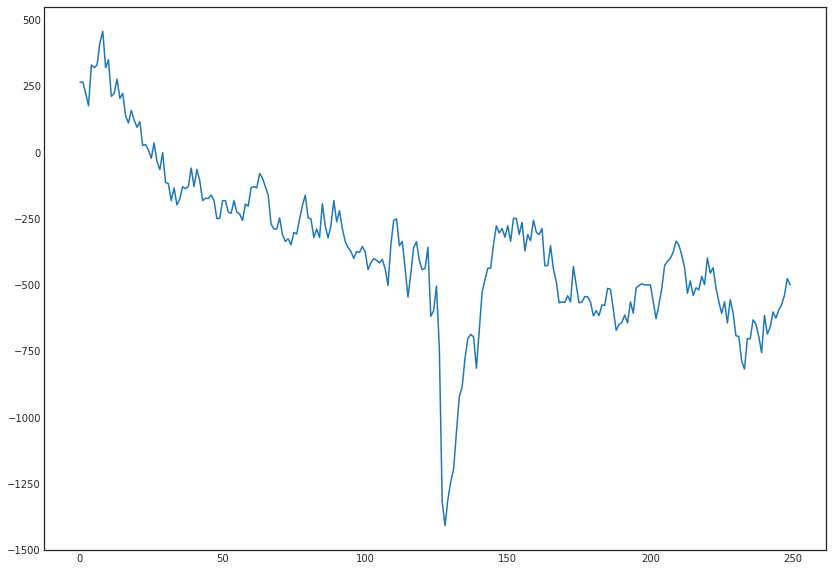

In [2]:
dirname = '/home/samuel/Documents/projet/DataSpikeSorting/tridesclous_datasets/tdc_striatum_rat'
dataio = tdc.DataIO(dirname=dirname)
sigs = dataio.get_signals_chunk(seg_num=0, chan_grp=0,
                i_start=0, i_stop=50000,
                signal_type='initial', return_type='raw_numpy')
sig = sigs[:, 0]

spike_full_band = sig[25500:25750]
fig, ax = plt.subplots()
ax.plot(spike_full_band)


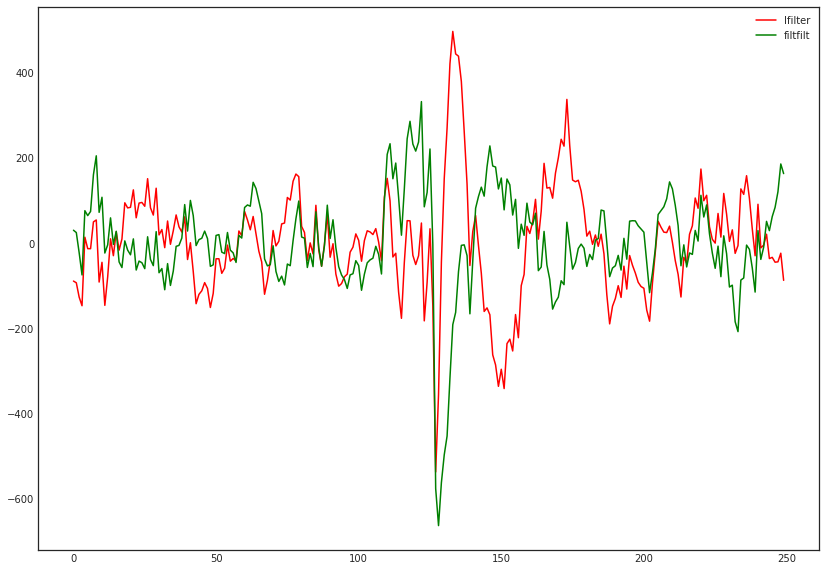

In [3]:
import scipy.signal
b, a = scipy.signal.iirfilter(5, 400./20000.*2, btype = 'highpass', ftype = 'butter', output = 'ba', analog=False)

fig, ax = plt.subplots()

sig_lfilter = scipy.signal.lfilter(b, a, sig)
spike_lfilter = sig_lfilter[25500:25750]
ax.plot(spike_lfilter, color='r', label='lfilter')

sig_filtfilt = scipy.signal.filtfilt(b, a, sig)
spike_filtfilt = sig_filtfilt[25500:25750]
ax.plot(spike_filtfilt, color='g', label='filtfilt')

ax.legend()

# Peak detection and threshold

 Normalisation = robust **Z-score**
  * magnitude 1 = 1 mad = 1 robust sd = 68% of the noise
  * magnitude 2 = 2 mad = 2 robust sd = 95% of the noise
  * magnitude 3 = 3 mad = 3 robust sd = 99.7% of the noise

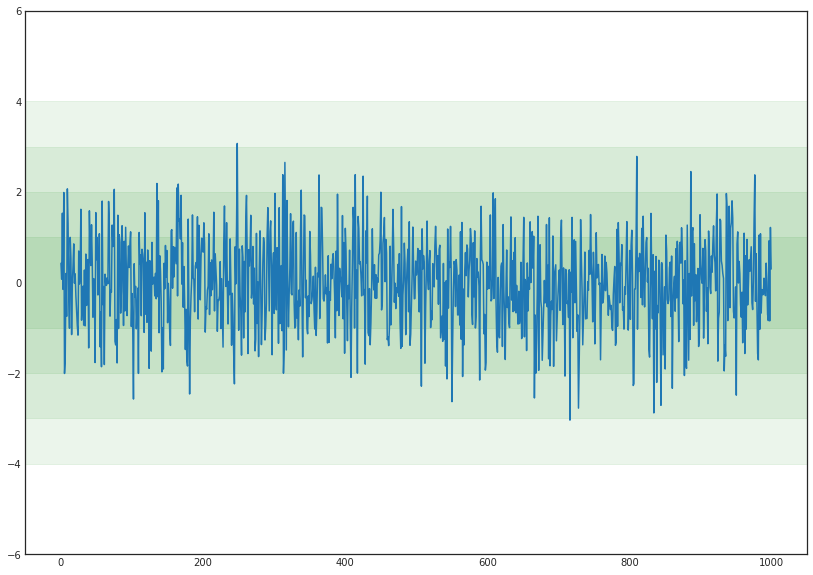

In [4]:
size = 1000
sig = np.random.randn(size)
fig, ax = plt.subplots()
ax.plot(sig)
ax.set_ylim(-6, 6)
for i in range(1, 5):
    ax.axhspan(-i, i, alpha=0.08, color='g') 

In [5]:
def basic_neg_peak_detector(sig, thresh=-3.5):
    sig0 = sig[0:-2]
    sig1 = sig[1:-1]
    sig2 = sig[2:]
    peak_ind, = np.nonzero((sig1<=sig0)&(sig1<sig2)&(sig1<thresh))
    return peak_ind+1


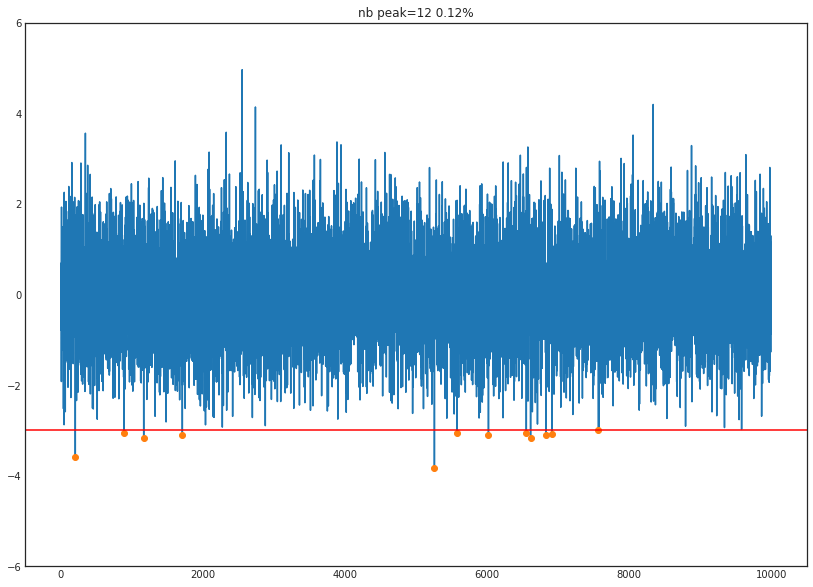

In [6]:
size = 10000
thresh = -3
sig = np.random.randn(size)
peak_ind = basic_neg_peak_detector(sig, thresh=thresh)
fig, ax = plt.subplots()
ax.plot(sig)
ax.plot(peak_ind, sig[peak_ind], ls='None', marker='o')
ax.set_ylim(-6, 6)
ax.axhline(thresh, color='r')
n = len(peak_ind)
ax.set_title('nb peak={} {}%'.format(n, n/size*100))

# Waveforms extraction

# Noise snippets extraction

# Feature extraction

# Clustering

# In between sample interpolation